In [1]:
import re
import matplotlib.pyplot as plt
import sys

In [2]:
def parse_logs(logs):
    """
    로그 텍스트를 파싱하여 에포크별 데이터를 추출합니다.
    """
    epochs = []
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    # 정규식 패턴 (이전과 동일)
    pattern = re.compile(
        r"Epoch (\d+)\s*\|\s*"
        r"Train Loss: ([\d.]+),\s*Train Acc: ([\d.]+)%\s*\|\s*"
        r"Val Loss: ([\d.]+),\s*Val Acc: ([\d.]+)%"
    )

    for line in logs.strip().split('\n'):
        match = pattern.search(line)
        if match:
            epochs.append(int(match.group(1)))
            train_losses.append(float(match.group(2)))
            train_accs.append(float(match.group(3)))
            val_losses.append(float(match.group(4)))
            val_accs.append(float(match.group(5)))
            
    return epochs, train_losses, train_accs, val_losses, val_accs

def plot_metrics(epochs, train_losses, train_accs, val_losses, val_accs):
    """
    추출된 데이터를 사용하여 2개의 그래프(Loss, Accuracy)를 그립니다.
    """
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- 그래프 1: Loss (ax1) ---
    ax1.plot(epochs, train_losses, 'o-', label='Train Loss')
    ax1.plot(epochs, val_losses, 's--', label='Validation Loss')
    ax1.set_title('Training and Validation Loss', fontsize=16)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.legend(fontsize=12)
    ax1.grid(True)
    ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True)) 

    # --- 그래프 2: Accuracy (ax2) ---
    ax2.plot(epochs, train_accs, 'o-', label='Train Accuracy')
    ax2.plot(epochs, val_accs, 's--', label='Validation Accuracy')
    ax2.set_title('Training and Validation Accuracy', fontsize=16)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy (%)', fontsize=12)
    ax2.legend(fontsize=12)
    ax2.grid(True)
    ax2.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

'C:/Users/Penguin/Desktop/VQA/checkpoints/ResNet50_BERT_gated_fusion/log.txt' 파일에서 총 4개의 에포크 로그를 읽었습니다. 그래프를 생성합니다.


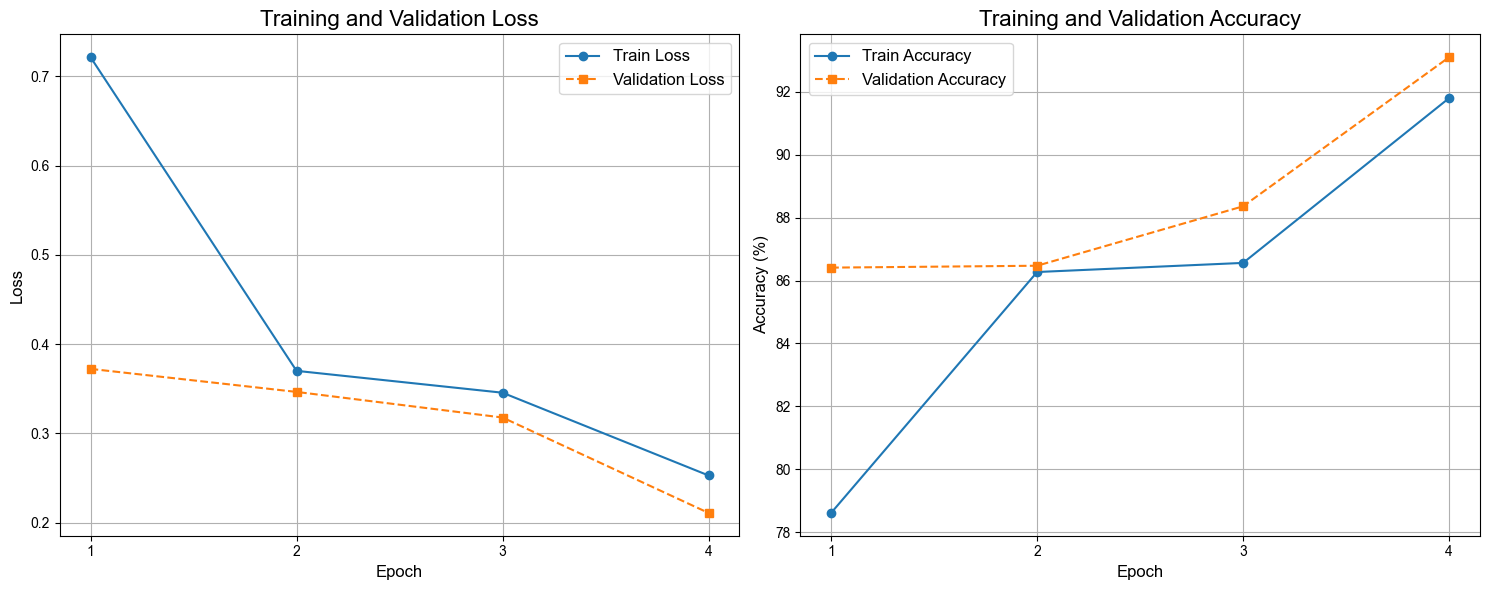

In [ ]:
# 1. 로그 파일 경로 설정
log_file_path = "C:/Users/Penguin/Desktop/VQA/checkpoints/ResNet50_BERT_gated_fusion/log.txt" 

try:
    # 2. 파일 열고 읽기
    with open(log_file_path, 'r', encoding='utf-8') as f:
        log_data = f.read()

    # 3. 로그 파싱
    data = parse_logs(log_data)

    plot_metrics(*data)